# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [1]:
!nvcc -o tp_cuda_part_1_1_pi part1/tp_cuda_part_1_1_pi.cu -O3
!nvcc -o tp_cuda_part_1_3_pi part1/tp_cuda_part_1_3_pi.cu -O3
!nvcc -o tp_cuda_part_1_4_pi part1/tp_cuda_part_1_4_pi.cu -O3

### Performance evaluation

In [ ]:
import os
import subprocess
import pandas as pd
try:
    os.remove("stats_part1.csv")
except OSError:
    pass

df = pd.DataFrame(columns=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'])
df.to_csv("stats_part1.csv", index=False)

num_steps = [100, 10000, 100000,1000000, 10000000, 100000000]
# num_steps = [10000, 1000000, 10000000, 100000000]
nb_threads_per_block = [1, 32, 64, 128, 256]
nb_steps_per_threads = [1, 64, 256, 1024]
repeats = range(0,10)

for nsteps in num_steps:
    for nthread_per_block in nb_threads_per_block:
        for nstep_per_thread in nb_steps_per_threads:
            for repeat in repeats:
                args = ("./tp_cuda_part_1_1_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()
                
                args = ("./tp_cuda_part_1_3_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./tp_cuda_part_1_4_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()



### Performance analysis

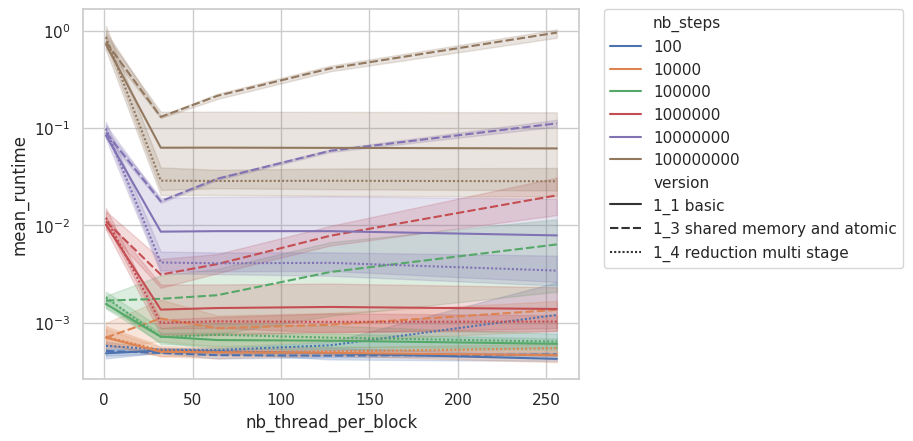

In [5]:
#Do the same as above, but with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="nb_thread_per_block", y="mean_runtime", hue="nb_steps", style="version", data=df_plot)

ax.set_yscale('log')
#make the legend smaller,  more readable outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()



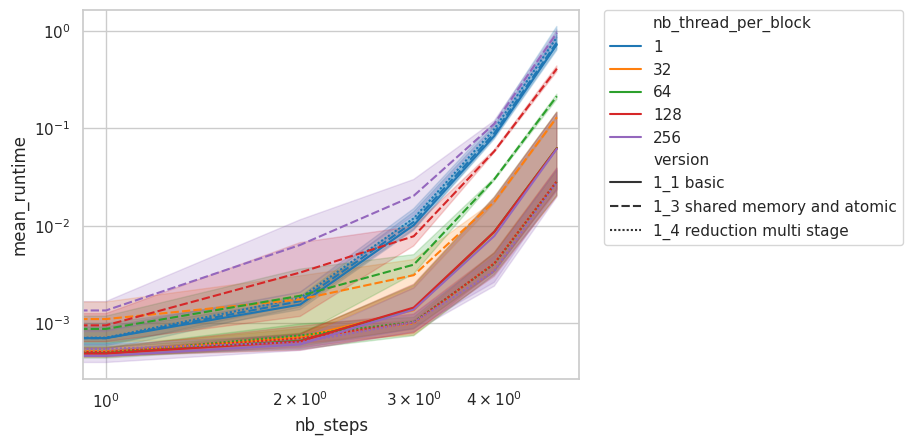

In [8]:
# Do the same as above, but with abscissa as the number of steps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")


ax = sns.lineplot(x="nb_steps", y="mean_runtime", hue="nb_thread_per_block", style="version", data=df_plot, palette="tab10")

ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


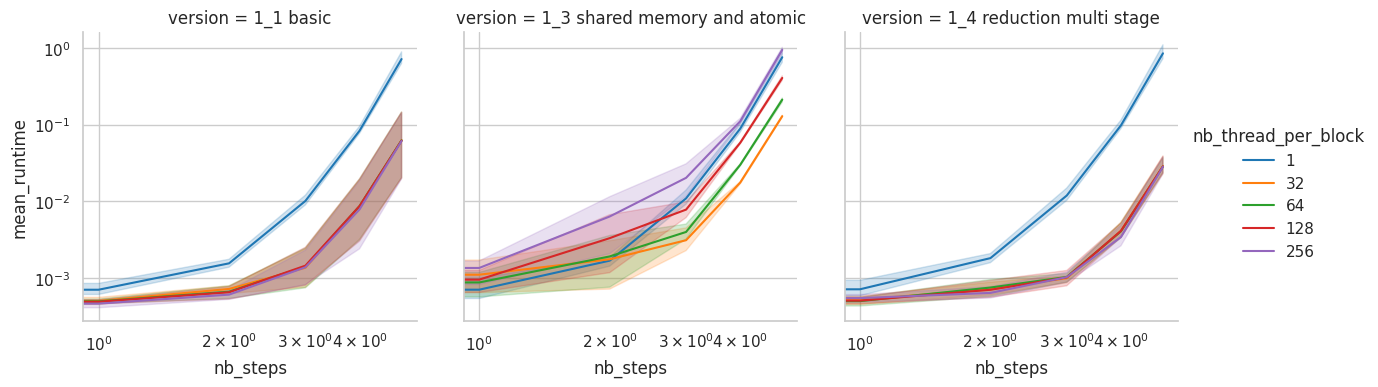

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)


df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")

g = sns.FacetGrid(df_plot, col="version", hue="nb_thread_per_block", col_wrap=3, height=4, sharex=False, sharey=True, palette="tab10")
#Change the color by the number of thread per block
g.map_dataframe(sns.lineplot, x="nb_steps", y="mean_runtime", style="version", data=df_plot)
g.set(xscale="log", yscale="log")
g.add_legend()
plt.show()



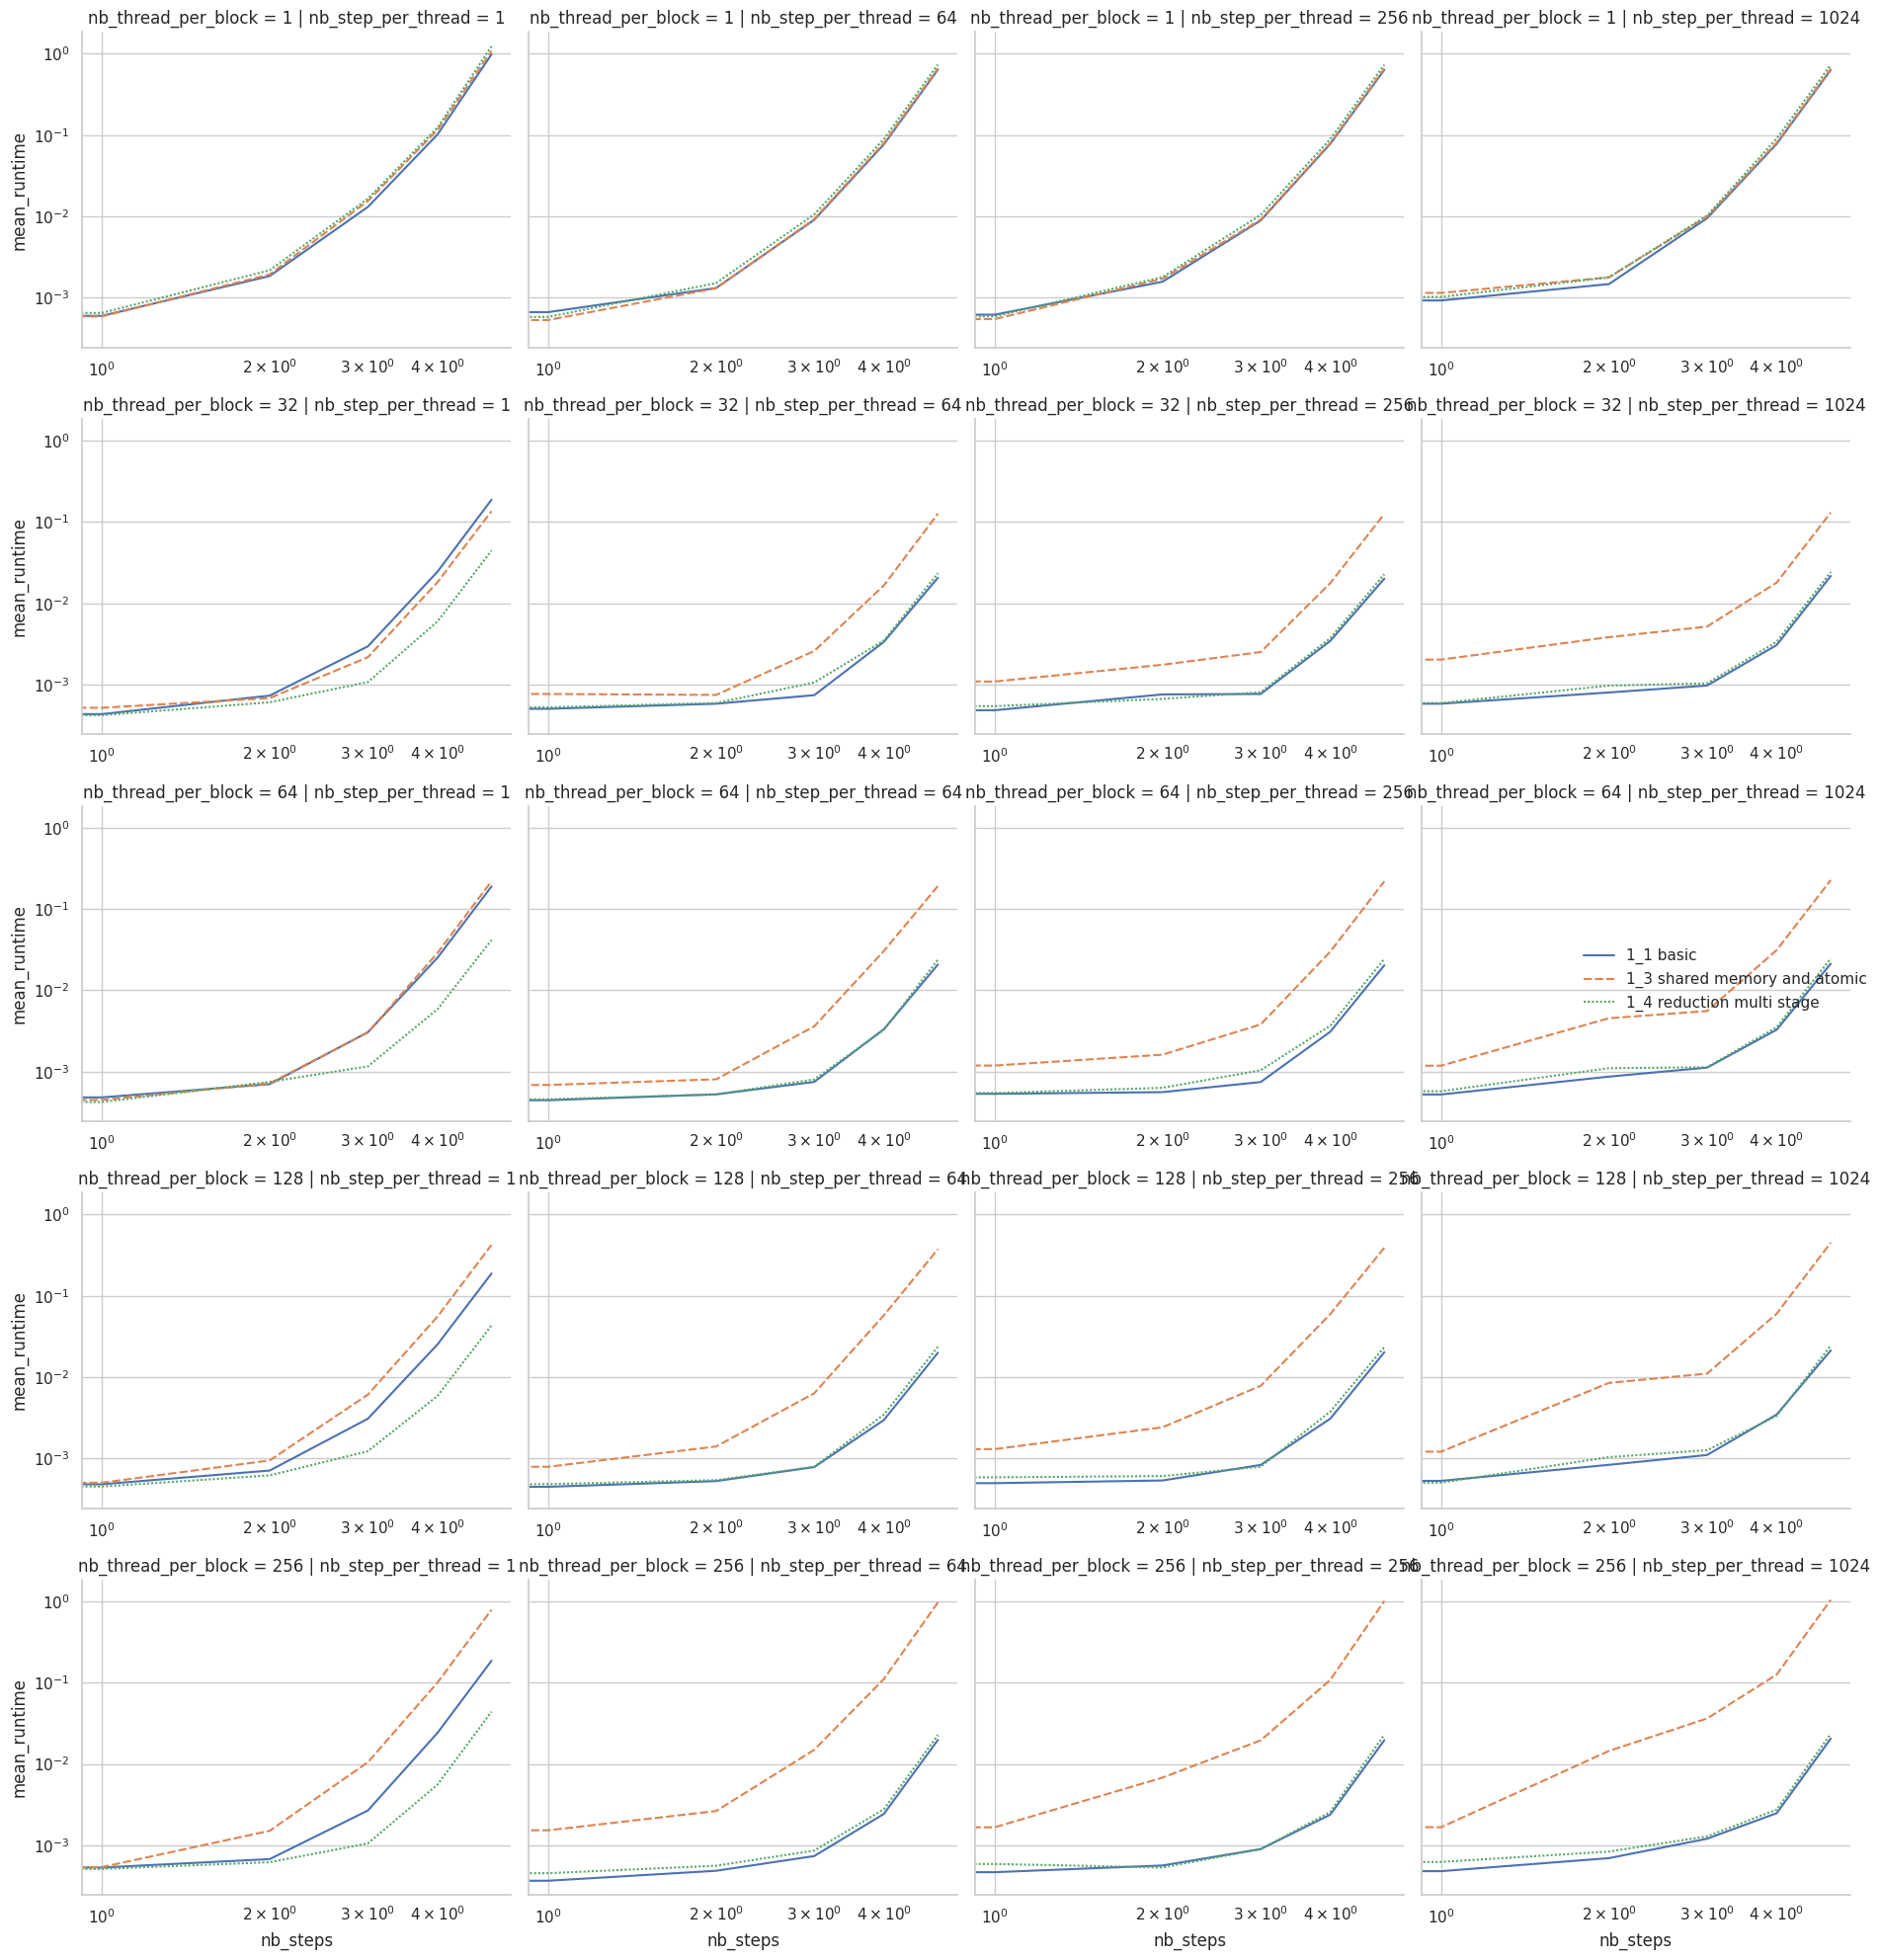

In [40]:
#2D Grid with each cell containing the mean runtime for a given number of steps and a given number of thread per block

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)


df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")
#Do a 2D Grid with columns being the steps per thread and rows being the number of thread per block, with each cell containing the mean runtime vs steps
g = sns.FacetGrid(df_plot, col="nb_step_per_thread", row="nb_thread_per_block", height=4, sharex=False, sharey=True, palette="tab10")
g.map_dataframe(sns.lineplot, x="nb_steps", y="mean_runtime", style="version", hue='version', data=df_plot)
g.set(xscale="log", yscale="log")
g.add_legend()
plt.tight_layout()
plt.show()



### Discussion

Les optimisations basiques du code (dans la version basic), c'est-à-dire l'utilisation de plusieurs blocs et de plusieurs threads par bloc, ne s'en sortent pas si mal, cette version semble relativement performante, sauf dans le cas où nous avons seulement 1 thread par bloc, où la performance est dégradée. 

Cette version semble par ailleurs être plus performante que la version avec la shared memory et les atomics, ce qui est assez surprenant. Nous pensons que cela est dû au fait que nous ayons mis le atomicAdd dans la boucle for qui réalise l'intégral partiel de chaque thread, ce qui augmente le nombre d'opérations sur une même variable, dégradant les performances. Une idée serait de garder une somme locale par thread et faire un atomicAdd à la fin de la boucle for. Ce qui n'a pas été testé ici.

La version qui se démarque le plus est donc la *1_4 reduction multi stage*, qui performe le mieux lorsque nous avons une quantité de calcul plus élevé, et qui semble être plus stable que les autres méthodes.

La version séquentielle quant à elle performe bien mieux que les versions parallélisées dans le cas ou nous avons relativement peu de calcul à réaliser, justifié par le fait que'elle est bien optimisée par le compilateur.

Il est par ailleurs intéressant de noter une dégradation notable des performances des méthodes parallélisées, lorsque nous dépassons les 32 threads par bloc, particulièrement sur la méthode *1_4 shared memory and atomic*, ce qui est logique, car plus nous augmentons le nombre de threads par bloc, plus nous avons de risque de conflit de mémoire, et donc de ralentissement. C'est donc un problème Memory Bound.

Maintenant en ce qui concerne les effets du nombre de steps par threads (steps per threads), cf. Grid 2D ci dessus.
Ce paramètre semble augmenter "l'ordonnée à l'origine" de la méthode *1_3 shared memory*, c'est à dire que les performances semblent moins bonnes lorsque nous augmentions ce paramètre, et que le nombre de calculs est faible. Ce comportement pourrait être justifié par le fait qu'augmenter le nombre de calculs sur un thread augmente fatalement le nombre d'accès mémoire nécessaire à la variable shared d'un même bloc, et augmente par la même occasion le risque de conflit de mémoire. De plus nous devons attendre la fin de tous les thread au sein d'un même bloc (__syncthreads).

Pour la méthode *1_1 basic*, augmenter ce paramètre semble, dans l'ensemble, allonger et aplatir la courbe de performance, la répartition de la charge de calcul semble donc être plus équilibrée lorsque nous augmentons ce paramètre. On peut néanmoins commencer à voir une perte de performance lorsque ce même paramètre devient trop important. 

En ce qui concerne la méthode *1_4 reduction multi stage*, ce paramètre ne semble avoir peu d'impact, elle permet dans certain cas d'améliorer les performances, mais dans l'ensemble, cette méthode semble performante dans la majorité des cas. On peut comme pour la méthode *1_1 basic*, commencer à voir une perte de performance lorsque ce paramètre devient trop important.

## Part 2 : Matrix-Vector operation
### Compilation

In [4]:
!nvcc -o tp_cuda_part_2_1_vector part2/tp_cuda_part_2_1_vector.cu -O3
!nvcc -o tp_cuda_part_2_2_vector part2/tp_cuda_part_2_2_vector.cu -O3
!nvcc -o tp_cuda_part_2_3_vector part2/tp_cuda_part_2_3_vector.cu -O3
!nvcc -o tp_cuda_part_2_4_vector part2/tp_cuda_part_2_4_vector.cu -O3

part2/tp_cuda_part_2_3_vector.cu(143): warning #177-D: variable "sum" was declared but never referenced



### Performance evaluation

In [5]:
import os
import subprocess
import pandas as pd
from tqdm import tqdm
try:
    os.remove("stats_part2.csv")
except OSError:
    pass

df = pd.DataFrame(columns=['version','nb_thread_per_block','N','M','repeat','runtime'])
df.to_csv("stats_part2.csv", index=False)

nb_threads_per_block = [1, 32, 64, 128, 256]
N = [2,4,8,10,12,14]
repeats = range(0,10)

for n in tqdm(N):
    for nthread_per_block in nb_threads_per_block:
        for repeat in repeats:
            args = ("./tp_cuda_part_2_1_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_cuda_part_2_2_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_cuda_part_2_3_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_cuda_part_2_4_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()



100%|██████████| 6/6 [35:34<00:00, 355.73s/it]


### Performance analysis

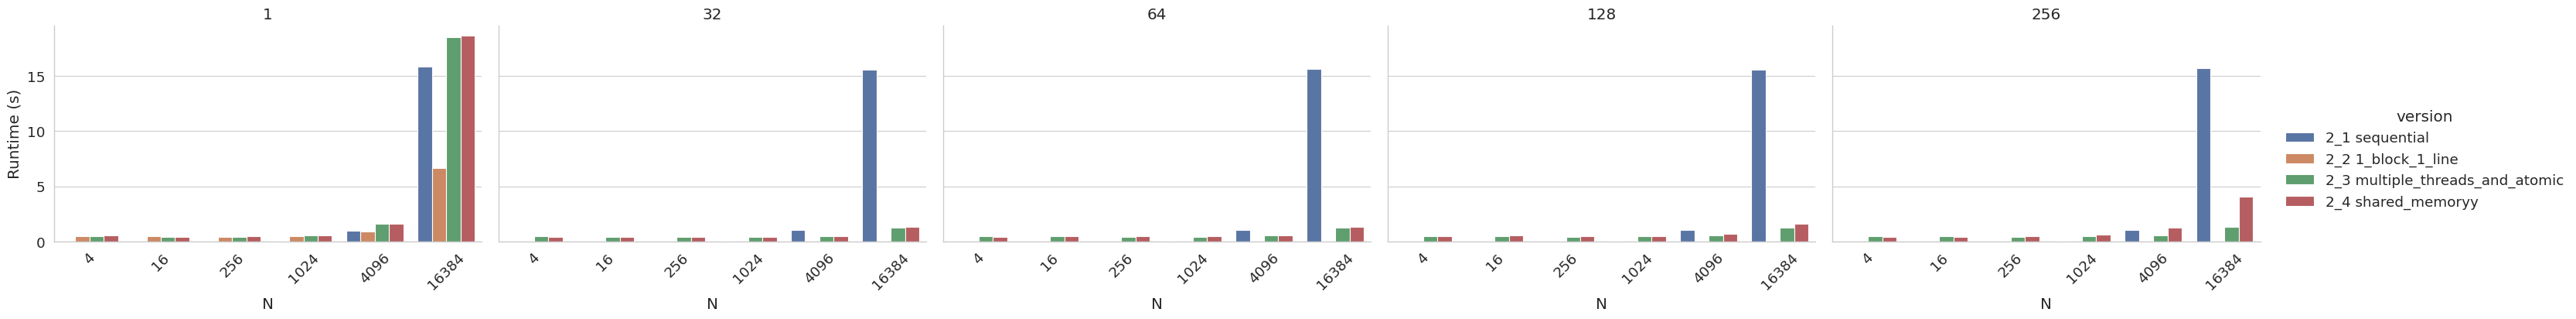

In [32]:
#plot runtime of the the Version and the number of thread per block vs N
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("stats_part2.csv")

df_plot = df[(df['version'] == "2_1 sequential")]
df_plot = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot['version'] = "2_1 sequential"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot[['version','nb_thread_per_block','N','mean_runtime']]
df_plot['N'] = df_plot['N'].astype(str)

df_plot2 = df[(df['version'] == "2_2 1_block_1_line")]
df_plot2 = df_plot2.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot2['version'] = "2_2 1_block_1_line"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2[['version','nb_thread_per_block','N','mean_runtime']]
df_plot2['N'] = df_plot2['N'].astype(str)

df_plot3 = df[(df['version'] == "2_3 multiple_threads_and_atomic")]
df_plot3 = df_plot3.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot3['version'] = "2_3 multiple_threads_and_atomic"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3[['version','nb_thread_per_block','N','mean_runtime']]
df_plot3['N'] = df_plot3['N'].astype(str)

df_plot4 = df[(df['version'] == "2_4 shared_memory")]
df_plot4 = df_plot4.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot4['version'] = "2_4 shared_memoryy"
df_plot4 = df_plot4.rename(columns={"runtime": "mean_runtime"})
df_plot4 = df_plot4[['version','nb_thread_per_block','N','mean_runtime']]
df_plot4['N'] = df_plot4['N'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)
df_plot = df_plot.append(df_plot4)

sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
g = sns.catplot(x="N", y="mean_runtime", hue="version", col="nb_thread_per_block", data=df_plot, kind="bar", height=4, aspect=1.5)

g.set_axis_labels("N", "Runtime (s)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.show()




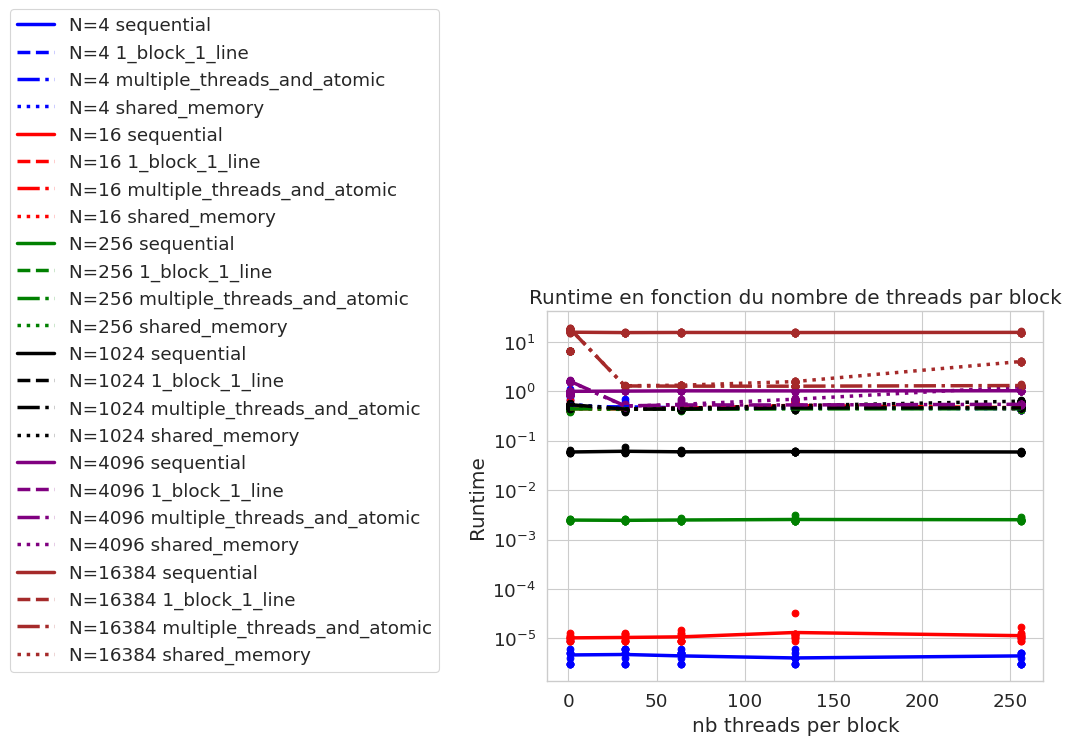

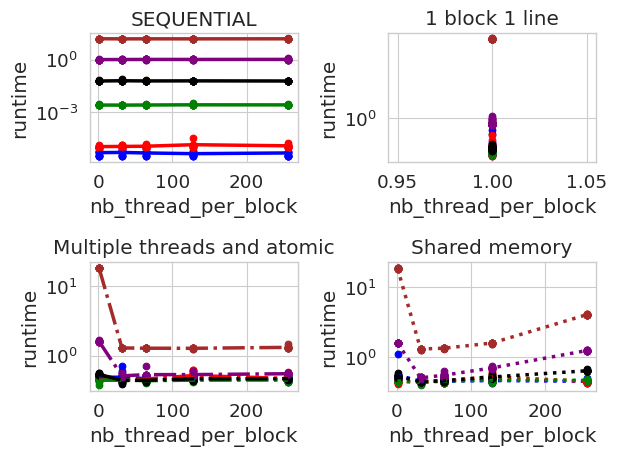

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('stats_part2.csv',header=0,names=['version','nb_thread_per_block','N','M','repeat','runtime'],dtype={
                     'version' : str,
                     'nb_thread_per_block':int,
                     'N': int,
                     'M': int,
                     'repeat' : int,
                     'runtime' : float
                 })

color_n_m = {2**2 : "blue", 2**4 : "red", 2**8 : "green", 2**10 : "black", 2**12 : "purple", 2**14 :"brown", 2**16:"pink"}

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_1 sequential"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="solid", label=f'N={N} sequential', color=color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_2 1_block_1_line"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashed", label=f'N={N} 1_block_1_line', color = color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_3 multiple_threads_and_atomic"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashdot", label=f'N={N} multiple_threads_and_atomic', color = color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_4 shared_memory"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dotted", label=f'N={N} shared_memory', color = color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

plt.yscale('log')
plt.xlabel('nb threads per block')
plt.ylabel('Runtime')
plt.title("Runtime en fonction du nombre de threads par block")
plt.legend(loc='lower right', bbox_to_anchor=(-0.2, 0))

fig = plt.figure()

#4x4 grid sublplot
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_1 sequential"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax1.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="solid", label=f'{N} sequential', color=color_n_m[N])
    ax1.set_yscale('log')
    ax1.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax1.set_title("SEQUENTIAL")
    ax1.set_xlabel("nb_thread_per_block")
    ax1.set_ylabel("runtime")

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_2 1_block_1_line"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax2.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashed", label=f'{N} 1_block_1_line', color = color_n_m[N])
    ax2.set_yscale('log')
    ax2.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax2.set_title("1 block 1 line")
    ax2.set_xlabel("nb_thread_per_block")
    ax2.set_ylabel("runtime")

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_3 multiple_threads_and_atomic"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax3.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashdot", label=f'{N} multiple_threads_and_atomic', color = color_n_m[N])
    ax3.set_yscale('log')
    ax3.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax3.set_title("Multiple threads and atomic")
    ax3.set_xlabel("nb_thread_per_block")
    ax3.set_ylabel("runtime")

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_4 shared_memory"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax4.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dotted", label=f'{N} shared_memory', color = color_n_m[N])
    ax4.set_yscale('log')
    ax4.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax4.set_title("Shared memory")
    ax4.set_xlabel("nb_thread_per_block")
    ax4.set_ylabel("runtime")


plt.tight_layout()
plt.show()

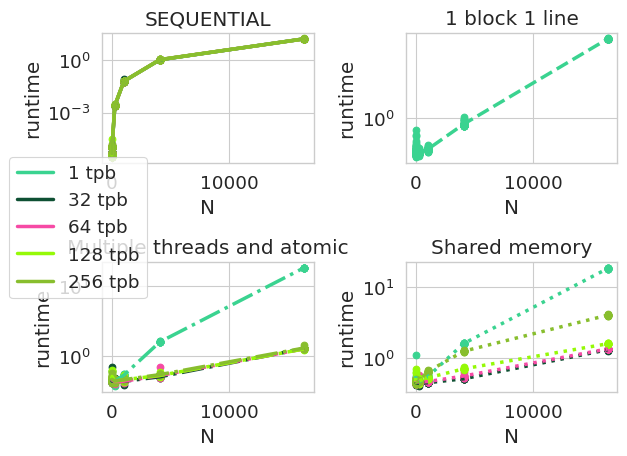

In [4]:
#Do the same as above but vs N
fig = plt.figure()

#4x4 grid sublplot
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

color_tpb = {}
for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    color_tpb[nb_thread_per_block] = np.random.rand(3,)

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_1 sequential"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax1.plot(mean_stats['N'], mean_stats['runtime'],linestyle="solid", label=f'{nb_thread_per_block} sequential', color=color_tpb[nb_thread_per_block])
    ax1.set_yscale('log')
    ax1.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax1.set_title("SEQUENTIAL")
    ax1.set_xlabel("N")
    ax1.set_ylabel("runtime")

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_2 1_block_1_line"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax2.plot(mean_stats['N'], mean_stats['runtime'],linestyle="dashed", label=f'{nb_thread_per_block} 1_block_1_line', color = color_tpb[nb_thread_per_block])
    ax2.set_yscale('log')
    ax2.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax2.set_title("1 block 1 line")
    ax2.set_xlabel("N")
    ax2.set_ylabel("runtime")

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_3 multiple_threads_and_atomic"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax3.plot(mean_stats['N'], mean_stats['runtime'],linestyle="dashdot", label=f'{nb_thread_per_block} multiple_threads_and_atomic', color = color_tpb[nb_thread_per_block])
    ax3.set_yscale('log')
    ax3.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax3.set_title("Multiple threads and atomic")
    ax3.set_xlabel("N")
    ax3.set_ylabel("runtime")

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_4 shared_memory"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax4.plot(mean_stats['N'], mean_stats['runtime'],linestyle="dotted", label=f'{nb_thread_per_block} shared_memory', color = color_tpb[nb_thread_per_block])
    ax4.set_yscale('log')
    ax4.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax4.set_title("Shared memory")
    ax4.set_xlabel("N")
    ax4.set_ylabel("runtime")


handles, labels = ax1.get_legend_handles_labels()
#replace labels onl the nb thread per block
labels = [label.split()[0] + " tpb" for label in labels]
#put the legend on the right outside the plot
fig.legend(handles, labels, loc='center left')




plt.tight_layout()
plt.show()


### Discussion
#### Sequential
Comme lors des précédentes analyses, nous pouvons observer que le nombre de thread n'influe pas sur les performances de l'implémentation séquentielle. En revanche, nous observons une très forte variation du runtime lorsque le nombre de lignes de la matrice augmente, jusqu'à 16384. Cependant, cette implémentation reste très efficace, voire meilleure que certaines implémentations parallélisées lorsque le nombre de lignes ne dépasse pas 1024.

#### 1 block 1 line
Dans cette implémentation, 1 bloque possède 1 thread qui s'occupe de faire le calcul vectoriel sur une seule ligne. Nous observons que, quelle que soit la taille de la matrice cette implémentation est plus efficace que les autres. Comme dit précédemment dans certains cas l'implémentation séquentielle reste meilleure, mais n'est plus efficace pour un grand nombre de lignes dans la matrice. Tandis que celle-ci continue d'avoir d'excellentes performances divisant presque par 3 le runtime de toutes les autres implémentations sur 16384 lignes. Ce phénomène est parfaitement explicable puisque nous travaillons dans cette configuration qu'avec un thread par block, le travail sera donc toujours bien réparti entre les blocs alors que dans les autres implémentations le travail ne sera pas bien réparti puisqu'ils sont optimisés pour avoir un nombre de threads plus élevé. Le temps d'exécution est quasiment linéaire en fonction de la taille de la matrice.

#### Multiple threads and atomic operation
Comme mentionné précédemment, cette implémentation n'est pas faite pour être exécuter avec un seul thread ce qui se répercute sur les performances du programme. En revanche, dès que le nombre de threads augmente à 32, nous voyons une nette diminution du temps d'exécution qui est quasiment divisé par 10. Nous remarquons également que, quel que soit le nombre de thread, pour des tailles de matrices équivalentes le temps d'exécution ne variera presque pas et restera toujours aux alentours de 1s. 

#### Shared memory
De même que pour l'implémentation précédente, avec un seul thread les performances ne sont pas du tout bonnes, voire légèrement moins bonnes avec le passage en mémoire partagée. Néanmoins les performances seront à peu près équivalentes à celle de l'implémentation précédente exceptée pour les 256 threads. Cette différence de performance peut être expliquée par l'utilisation de la mémoire partagée qui va être utilisée par de plus en plus de threads et ralentir ainsi le programme.

#### Conclusion
Finalement, nous avons pu comparer différentes implémentations et voir lesquelles étaient les plus performantes selon les usages. Lorsque nous utilisons 1 seul thread avec une matrice de petite taille nous préférerons utiliser l'implémentation séquentielle qui sera remplacée par l'implémentation parallélisée *1 block 1 line* pour les matrices de plus grosse taille. Cependant, lorsque nous pourrons utiliser plus de threads et que nous aurons à faire des calculs sur de grosses matrices, l'implémentation qui semble être la plus appropriée sera celle utilisant les opérations atomiques, mais sans utiliser la mémoire partagée. En effet, cette implémentation a l'avantage d'avoir des performances linéaires, quel que soit le nombre de threads ou la taille de la matrice contrairement à celle utilisant la mémoire partagée présentant des faiblesses lorsque le nombre de threads est trop important.